## Preparing data to be used in the web map

1. Downloading New Jersey boundary as GeoJSON

In [1]:
import cenpy as cen
import geopandas as gpd
%matplotlib inline

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
# Get the NJ state boundary from the TIGER API to plot with the data (see Census
# Jupyter Notebook for more exploration of this process)
con = cen.base.Connection('ACSDT5Y2017')
con.set_mapservice('tigerWMS_ACS2017')

#Get state boundary data
NJ_boundary = con.mapservice.query(layer=82, where='STATE=34',pkg='geopandas')

In [3]:
# The current way the crs is stored is a dictionary using latestwkid, which causes errors during export. I converted the crs 
# dictionary into one readable by geopandas, but it is not transforming the data in any way. 
NJ_boundary.crs = {'init': 'epsg:3857'}

In [15]:
NJ_boundary = NJ_boundary.to_crs({'init': 'epsg:4326'})

In [16]:
# Save file as GeoJSON
NJ_boundary.to_file('NJ_boundary.geojson', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [17]:
NJ = gpd.read_file('NJ_boundary.geojson')

In [18]:
NJ.crs

{'init': 'epsg:4326'}

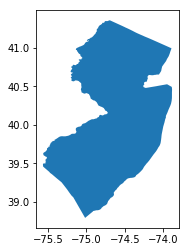

In [19]:
NJ.plot()

2. Convert PWS data to right coordinate system

In [9]:
aw = gpd.read_file('../../Data/Created/SpatialAnalysis/AW_vios.geojson')

In [10]:
aw.crs

{'init': 'epsg:3424'}

In [11]:
aw = aw.to_crs({'init': 'epsg:4326'})

In [12]:
aw.to_file('pws_aw.geojson', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [13]:
aw.to_file('./working/pws_aw.shp', driver='ESRI Shapefile')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
